<a href="https://colab.research.google.com/github/Deepa-2412/Weather-prediction-using-machine-learning/blob/main/Weather_prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/seattle-weather-1.csv')
df

,date,precipitation,temp_max,temp_min,wind,weather
0,01-01-2012,0.0,12.8,5.0,4.7,drizzle
1,02-01-2012,10.9,10.6,2.8,4.5,rain
2,03-01-2012,0.8,11.7,7.2,2.3,rain
3,04-01-2012,20.3,12.2,5.6,4.7,rain
4,05-01-2012,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,27-12-2015,8.6,4.4,1.7,2.9,rain
1457,28-12-2015,1.5,5.0,1.7,1.3,rain
1458,29-12-2015,0.0,7.2,0.6,2.6,fog
1459,30-12-2015,0.0,5.6,-1.0,3.4,sun


In [ ]:
df['weather'].value_counts()

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

In [ ]:
df['weather'].unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['weather']=le.fit_transform(df['weather'])

In [ ]:
df.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [ ]:
df.dtypes

date              object
precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather            int64
dtype: object

In [ ]:
df1=df.drop(['date'],axis=1)
df1

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,0
1,10.9,10.6,2.8,4.5,2
2,0.8,11.7,7.2,2.3,2
3,20.3,12.2,5.6,4.7,2
4,1.3,8.9,2.8,6.1,2
...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,2
1457,1.5,5.0,1.7,1.3,2
1458,0.0,7.2,0.6,2.6,1
1459,0.0,5.6,-1.0,3.4,4


In [ ]:
df1.corr()

,precipitation,temp_max,temp_min,wind,weather
precipitation,1.000000,-0.228555,-0.072684,0.328045,-0.267388
temp_max,-0.228555,1.000000,0.875687,-0.164857,0.322337
temp_min,-0.072684,0.875687,1.000000,-0.074185,0.154981
wind,0.328045,-0.164857,-0.074185,1.000000,-0.065858
weather,-0.267388,0.322337,0.154981,-0.065858,1.000000


<Axes: >

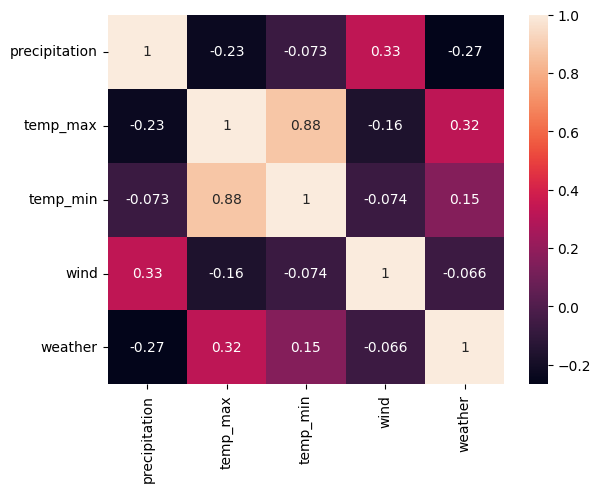

In [ ]:
import seaborn as sns
sns.heatmap(df1.corr(),annot=True)

In [ ]:
x=df1.iloc[:,:-1]
x

,precipitation,temp_max,temp_min,wind
0,0.0,12.8,5.0,4.7
1,10.9,10.6,2.8,4.5
2,0.8,11.7,7.2,2.3
3,20.3,12.2,5.6,4.7
4,1.3,8.9,2.8,6.1
...,...,...,...,...
1456,8.6,4.4,1.7,2.9
1457,1.5,5.0,1.7,1.3
1458,0.0,7.2,0.6,2.6
1459,0.0,5.6,-1.0,3.4


In [ ]:
y=df.iloc[:,-1]
y

0       0
1       2
2       2
3       2
4       2
       ..
1456    2
1457    2
1458    1
1459    4
1460    4
Name: weather, Length: 1461, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(x)
X_scaled

array([[0.        , 0.38709677, 0.47637795, 0.47252747],
       [0.19499106, 0.32795699, 0.38976378, 0.45054945],
       [0.01431127, 0.35752688, 0.56299213, 0.20879121],
       ...,
       [0.        , 0.23655914, 0.30314961, 0.24175824],
       [0.        , 0.19354839, 0.24015748, 0.32967033],
       [0.        , 0.19354839, 0.19685039, 0.34065934]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1)

In [ ]:
x_train.shape,y_train.shape

((1022, 4), (1022,))

In [ ]:
x_test.shape,y_test.shape

((439, 4), (439,))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred=knn.predict(x_test)
y_pred

array([4, 4, 2, 4, 2, 2, 2, 1, 2, 2, 4, 4, 4, 4, 4, 4, 4, 2, 4, 1, 4, 4,
       2, 2, 2, 4, 2, 2, 2, 4, 4, 4, 2, 2, 2, 1, 4, 1, 2, 4, 2, 2, 4, 2,
       2, 2, 4, 4, 4, 2, 4, 1, 2, 2, 4, 2, 2, 2, 4, 4, 4, 4, 2, 2, 2, 2,
       2, 4, 4, 1, 2, 4, 4, 0, 4, 2, 0, 2, 2, 4, 4, 4, 2, 2, 2, 1, 2, 4,
       4, 2, 4, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 4, 4, 2, 4, 2,
       0, 4, 4, 2, 4, 4, 4, 2, 4, 4, 4, 2, 2, 2, 1, 2, 2, 4, 2, 1, 2, 4,
       2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 1, 2, 2, 1, 4, 2, 2, 4, 2, 2, 4,
       4, 2, 4, 4, 2, 0, 2, 4, 2, 4, 2, 4, 4, 4, 4, 0, 1, 2, 2, 2, 2, 2,
       2, 2, 4, 2, 2, 4, 4, 4, 4, 2, 1, 4, 1, 2, 2, 2, 4, 2, 4, 2, 4, 4,
       2, 2, 4, 2, 2, 2, 4, 4, 4, 4, 0, 4, 4, 2, 4, 2, 1, 4, 2, 2, 4, 2,
       4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 1, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4,
       2, 1, 4, 2, 2, 4, 4, 0, 4, 1, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4, 4,
       4, 2, 4, 2, 2, 4, 4, 4, 2, 2, 4, 4, 4, 2, 2, 4, 2, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 4, 2, 4, 4,

In [ ]:
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay
print(accuracy_score(y_test,y_pred)*100)
#print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

68.10933940774487


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.18      0.14      0.16        14
           1       0.26      0.17      0.21        35
           2       0.76      0.82      0.79       189
           3       0.00      0.00      0.00         8
           4       0.68      0.70      0.69       193

    accuracy                           0.68       439
   macro avg       0.38      0.37      0.37       439
weighted avg       0.65      0.68      0.67       439



In [ ]:
from sklearn.svm import SVC
sv=SVC(kernel='linear')
sv.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
y_pred1=sv.predict(x_test)
y_pred1

array([4, 4, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 2,
       4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 2, 4, 4,
       2, 2, 4, 4, 4, 2, 4, 4, 2, 2, 4, 2, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2,
       2, 4, 4, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2, 4, 2, 4,
       4, 2, 4, 4, 2, 4, 2, 4, 4, 4, 2, 4, 4, 4, 4, 2, 2, 4, 4, 2, 4, 4,
       4, 4, 4, 2, 4, 4, 4, 2, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2,
       2, 4, 4, 4, 4, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4,
       4, 4, 4, 4, 2, 4, 2, 4, 2, 4, 2, 4, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2,
       4, 2, 4, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 2, 2, 2, 4, 2, 4, 4, 4, 2,
       2, 2, 4, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2,
       4, 2, 2, 2, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2,
       2, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 2, 4, 4, 4, 2, 4, 4, 4, 4, 2, 2, 4, 2, 2, 4, 2, 4, 2,
       2, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 4, 2, 4, 4,

In [ ]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.00      0.00      0.00        35
           2       0.77      0.82      0.79       189
           3       0.00      0.00      0.00         8
           4       0.69      0.84      0.76       193

    accuracy                           0.72       439
   macro avg       0.29      0.33      0.31       439
weighted avg       0.63      0.72      0.67       439



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_pred2=dt.predict(x_test)
y_pred2

array([4, 4, 1, 4, 2, 2, 4, 2, 2, 2, 0, 4, 4, 1, 3, 4, 4, 1, 4, 0, 2, 4,
       0, 2, 2, 4, 1, 2, 2, 4, 4, 2, 0, 2, 1, 4, 4, 4, 2, 4, 4, 0, 4, 4,
       2, 2, 4, 4, 2, 2, 1, 2, 2, 2, 4, 2, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2,
       2, 4, 4, 4, 2, 4, 4, 2, 4, 2, 3, 2, 2, 4, 4, 4, 2, 2, 4, 2, 4, 4,
       4, 2, 0, 0, 2, 4, 2, 4, 4, 4, 2, 4, 4, 1, 4, 2, 2, 4, 4, 2, 4, 4,
       0, 2, 2, 2, 4, 4, 4, 2, 4, 4, 4, 2, 2, 4, 4, 2, 2, 4, 2, 4, 2, 2,
       4, 2, 4, 4, 2, 1, 4, 2, 2, 4, 2, 2, 2, 2, 2, 0, 2, 2, 4, 2, 2, 4,
       1, 4, 4, 2, 2, 0, 2, 0, 2, 4, 2, 4, 4, 4, 4, 0, 4, 2, 2, 2, 2, 2,
       1, 2, 1, 2, 2, 4, 4, 2, 4, 2, 1, 4, 4, 2, 2, 2, 4, 2, 0, 2, 0, 2,
       2, 2, 4, 1, 2, 2, 4, 4, 4, 4, 1, 4, 4, 2, 2, 2, 1, 4, 2, 2, 4, 2,
       4, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 2, 4, 4, 2, 1, 2, 2, 2, 2, 4,
       2, 1, 0, 2, 2, 4, 4, 0, 0, 4, 0, 2, 4, 2, 4, 2, 4, 4, 4, 2, 4, 4,
       4, 2, 1, 2, 2, 4, 0, 2, 2, 0, 2, 0, 4, 2, 2, 4, 2, 3, 2, 2, 4, 2,
       1, 2, 3, 2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 4, 4,

In [ ]:
print(accuracy_score(y_test,y_pred)*100)

68.10933940774487


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
rf=RandomForestClassifier(random_state=1,n_estimators=100,criterion='gini',max_depth=6)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, random_state=1)

In [ ]:
y_predrf=rf.predict(x_test)
y_predrf

array([4, 4, 4, 4, 2, 2, 4, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4,
       4, 2, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4,
       2, 2, 4, 4, 2, 2, 4, 4, 2, 2, 4, 2, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2,
       2, 4, 4, 4, 2, 4, 4, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 2, 4, 2, 4, 4,
       4, 2, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 4, 4, 4, 2, 2, 4, 4, 2, 4, 4,
       4, 2, 4, 2, 4, 4, 4, 2, 4, 4, 4, 2, 2, 4, 4, 2, 2, 4, 2, 4, 2, 2,
       4, 2, 4, 4, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 4, 4, 2, 2, 4, 2, 2, 4,
       4, 4, 4, 4, 2, 4, 2, 4, 2, 4, 2, 4, 4, 4, 4, 4, 4, 2, 4, 2, 2, 2,
       1, 2, 4, 2, 2, 4, 4, 2, 4, 2, 4, 4, 4, 2, 2, 2, 4, 2, 4, 4, 4, 2,
       2, 2, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 2,
       4, 2, 2, 2, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2, 4,
       2, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 4, 4, 2, 4, 4,
       4, 2, 4, 2, 2, 4, 4, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 4, 2,
       4, 2, 3, 2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 4, 4,

In [ ]:
print(classification_report(y_test,y_predrf))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       1.00      0.03      0.06        35
           2       0.96      0.93      0.95       189
           3       1.00      0.12      0.22         8
           4       0.76      1.00      0.86       193

    accuracy                           0.85       439
   macro avg       0.74      0.42      0.42       439
weighted avg       0.85      0.85      0.80       439



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
ab=AdaBoostClassifier(random_state=1)
ab.fit(x_train,y_train)

AdaBoostClassifier(random_state=1)

In [ ]:
y_predab=ab.predict(x_test)
y_predab

array([4, 4, 4, 4, 2, 2, 4, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 1, 4, 4, 2, 4,
       4, 2, 2, 4, 4, 2, 2, 4, 4, 3, 1, 2, 4, 4, 4, 4, 2, 4, 2, 4, 4, 4,
       2, 2, 4, 4, 2, 2, 4, 4, 2, 2, 4, 2, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2,
       2, 4, 4, 4, 2, 4, 0, 2, 4, 3, 2, 2, 2, 4, 4, 4, 2, 2, 2, 2, 4, 4,
       4, 2, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 4, 4, 4, 3, 2, 4, 4, 2, 4, 4,
       4, 2, 4, 2, 4, 4, 4, 2, 4, 4, 4, 2, 2, 4, 4, 2, 2, 4, 2, 4, 2, 2,
       4, 2, 4, 4, 2, 4, 4, 4, 2, 2, 2, 4, 2, 2, 1, 4, 2, 2, 4, 2, 2, 4,
       4, 4, 4, 4, 2, 4, 2, 4, 2, 4, 2, 4, 4, 4, 4, 0, 4, 2, 4, 2, 2, 2,
       4, 2, 4, 2, 2, 4, 4, 2, 4, 2, 4, 4, 4, 2, 3, 2, 4, 2, 4, 0, 4, 2,
       2, 2, 4, 1, 2, 2, 4, 4, 4, 1, 4, 4, 4, 2, 2, 2, 1, 4, 2, 2, 4, 3,
       4, 3, 2, 3, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 3, 4,
       2, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 2, 4, 4, 4, 2, 4, 4,
       4, 2, 4, 3, 2, 4, 4, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 3, 2, 2, 4, 2,
       4, 2, 3, 2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 4, 4,

In [ ]:
print(classification_report(y_test,y_predab))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.33      0.09      0.14        35
           2       0.96      0.88      0.92       189
           3       0.31      0.62      0.42         8
           4       0.77      0.93      0.84       193

    accuracy                           0.81       439
   macro avg       0.47      0.50      0.46       439
weighted avg       0.78      0.81      0.78       439



In [ ]:
gb=GradientBoostingClassifier(random_state=1)
gb.fit(x_train,y_train)

GradientBoostingClassifier(random_state=1)

In [ ]:
y_predgb=gb.predict(x_test)
y_predgb

array([4, 4, 1, 4, 2, 2, 4, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4,
       4, 2, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2, 2, 4, 4, 4, 2, 4, 4, 4, 4, 4,
       2, 2, 4, 4, 2, 2, 4, 4, 2, 2, 4, 2, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2,
       2, 4, 4, 4, 2, 4, 4, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 2, 4, 2, 4, 4,
       4, 2, 4, 0, 2, 4, 2, 4, 4, 4, 2, 4, 4, 1, 4, 3, 2, 4, 4, 2, 4, 4,
       4, 2, 4, 2, 4, 4, 4, 2, 4, 4, 4, 2, 2, 4, 4, 2, 2, 4, 2, 4, 2, 2,
       4, 2, 4, 1, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 4, 4, 2, 2, 4, 2, 2, 4,
       4, 4, 4, 4, 2, 4, 2, 4, 2, 4, 2, 4, 4, 4, 4, 4, 4, 2, 4, 2, 2, 2,
       1, 2, 4, 2, 2, 4, 4, 2, 4, 2, 1, 4, 4, 2, 2, 2, 4, 2, 4, 4, 4, 2,
       2, 2, 4, 1, 2, 2, 4, 4, 4, 4, 0, 4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 2,
       4, 2, 2, 2, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2, 4,
       2, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 4, 4, 2, 4, 4,
       4, 2, 4, 2, 2, 4, 4, 2, 2, 0, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 4, 2,
       4, 2, 3, 2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 4, 4,

In [ ]:
print(classification_report(y_test,y_predgb))

              precision    recall  f1-score   support

           0       0.40      0.14      0.21        14
           1       0.40      0.11      0.18        35
           2       0.94      0.93      0.94       189
           3       1.00      0.25      0.40         8
           4       0.77      0.94      0.85       193

    accuracy                           0.83       439
   macro avg       0.70      0.48      0.51       439
weighted avg       0.81      0.83      0.81       439



In [ ]:
xg=XGBClassifier(random_state=1)
xg.fit(x_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_predxgb=xg.predict(x_test)
y_predxgb

array([4, 4, 1, 4, 2, 2, 4, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 0, 2, 4,
       4, 2, 2, 4, 1, 2, 2, 4, 4, 2, 4, 2, 2, 4, 4, 4, 2, 4, 4, 4, 4, 4,
       2, 2, 4, 4, 2, 2, 4, 4, 2, 2, 4, 2, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2,
       2, 4, 4, 4, 2, 4, 4, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 2, 4, 2, 2, 4,
       4, 2, 4, 0, 2, 4, 2, 4, 4, 4, 2, 4, 4, 1, 4, 2, 2, 4, 4, 2, 4, 4,
       0, 2, 4, 2, 4, 4, 4, 2, 4, 4, 4, 2, 2, 4, 4, 2, 2, 4, 2, 4, 2, 2,
       4, 2, 4, 4, 2, 4, 4, 2, 2, 4, 2, 4, 2, 2, 1, 4, 2, 2, 4, 2, 2, 4,
       4, 4, 4, 4, 2, 4, 2, 4, 2, 4, 2, 4, 4, 4, 4, 4, 1, 2, 4, 2, 2, 2,
       1, 2, 4, 2, 2, 4, 4, 2, 4, 2, 1, 4, 4, 2, 2, 2, 4, 2, 0, 4, 4, 2,
       2, 2, 4, 4, 2, 2, 4, 4, 4, 4, 0, 4, 4, 2, 2, 2, 1, 4, 2, 2, 4, 2,
       4, 2, 2, 2, 2, 4, 2, 4, 2, 1, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2, 1,
       2, 4, 4, 2, 2, 4, 4, 0, 4, 1, 4, 2, 4, 4, 4, 2, 4, 4, 4, 2, 4, 4,
       4, 2, 4, 2, 2, 4, 4, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 4, 2,
       1, 2, 3, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4,

In [ ]:
print(classification_report(y_test,y_predxgb))

              precision    recall  f1-score   support

           0       0.12      0.07      0.09        14
           1       0.38      0.17      0.24        35
           2       0.92      0.93      0.92       189
           3       1.00      0.12      0.22         8
           4       0.78      0.90      0.83       193

    accuracy                           0.81       439
   macro avg       0.64      0.44      0.46       439
weighted avg       0.79      0.81      0.79       439



In [ ]:
from sklearn.model_selection import GridSearchCV
params={'n_estimators':[60,80,100],
        'criterion':['gini','entropy','log_loss'],
        'max_features':['sqrt','log2','None']}
clf=GridSearchCV(rf,params,cv=10,scoring='accuracy')
clf.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
90 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_depth=6, random_state=1),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2', 'None'],
                         'n_estimators': [60, 80, 100]},
             scoring='accuracy')

In [ ]:
print(clf.best_params_)

{'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 60}


In [ ]:
rf1=RandomForestClassifier(random_state=1,n_estimators=60,criterion='gini',max_features='sqrt')
rf1.fit(x_train,y_train)

RandomForestClassifier(n_estimators=60, random_state=1)

In [ ]:
y_predrf1=rf1.predict(x_test)
y_predrf1

array([4, 4, 1, 4, 2, 2, 4, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4,
       4, 2, 2, 4, 1, 2, 2, 4, 4, 2, 4, 2, 2, 4, 4, 4, 2, 4, 4, 4, 4, 4,
       2, 2, 4, 4, 2, 2, 4, 4, 2, 2, 4, 2, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2,
       2, 4, 4, 4, 2, 4, 4, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 2, 1, 2, 4, 4,
       4, 2, 4, 4, 1, 4, 2, 4, 4, 4, 2, 4, 4, 1, 4, 2, 2, 4, 4, 2, 4, 4,
       0, 2, 4, 2, 4, 4, 4, 2, 4, 4, 4, 2, 2, 4, 4, 2, 2, 4, 2, 4, 2, 2,
       4, 2, 4, 4, 2, 1, 4, 2, 2, 4, 2, 4, 2, 2, 1, 4, 2, 2, 4, 2, 2, 4,
       4, 4, 4, 4, 2, 4, 2, 4, 2, 4, 2, 4, 4, 4, 4, 4, 4, 2, 4, 2, 2, 2,
       1, 2, 4, 2, 2, 4, 4, 2, 4, 2, 1, 4, 4, 2, 2, 2, 4, 2, 4, 4, 4, 2,
       2, 2, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 1, 4, 2, 2, 4, 2,
       4, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2, 4,
       2, 4, 4, 2, 2, 4, 4, 0, 4, 4, 4, 2, 4, 4, 4, 2, 4, 4, 4, 2, 4, 4,
       4, 2, 4, 2, 2, 4, 4, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 4, 2,
       4, 2, 3, 2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 4, 4,

In [ ]:
print(classification_report(y_test,y_predrf1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.25      0.11      0.16        35
           2       0.95      0.93      0.94       189
           3       1.00      0.12      0.22         8
           4       0.76      0.92      0.83       193

    accuracy                           0.82       439
   macro avg       0.59      0.42      0.43       439
weighted avg       0.78      0.82      0.79       439



In [ ]:
import pickle
pickle.dump(rf,open('rfmodel.sav','wb'))

In [ ]:
pickle.dump(scaler,open('minmax.sav','wb'))